# *Experiment 7*

# *Adaline Network*

In [27]:
# import the required modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import csv

In [61]:
class graph:
    
    def __init__(self):
        
        # Set properties of the graph
        plt.axis([-3,3,-3,3])
        plt.grid(True)
        plt.xlabel("X axis")
        plt.ylabel("Y axis")
        plt.title("Linear Separability for current weights")

        # Plot the x and y axis 
        plt.axhline(linewidth = 1, color='black')
        plt.axvline(linewidth = 1, color='black')
    
    def plotpoints(self,training_data,actualop):
        
        # Plot of input values
        # Positive values are red and cross
        # Negative values are blue and circled
        for x in range(4):
            if(actualop[x] > 0):
                plt.plot(training_data[x][0],training_data[x][1],'rx')
            else :
                plt.plot(training_data[x][0],training_data[x][1],'bo')
                
    def draw(self,weights,it,isLast=False):
        
        # Plot the lines for every iteration
        axes = plt.gca()
        x_vals = np.array(axes.get_xlim())
        
        if(weights[1] == 0):
            return None
        
        slope = (-weights[0] / weights[1])
        intercept = (-weights[2] / weights[1])
    
        # iteration number
        s = "{}".format(it)
        
        # y coordinate
        y_vals = intercept + slope * x_vals
        
        if(isLast):
            plt.plot(x_vals, y_vals,color='black', linewidth=2.0)
        else:
            plt.plot(x_vals, y_vals, '--')
            
        # show the iteration number
        plt.text(x_vals[0],y_vals[0],s,fontsize=12)        

    def plotmsq(self,msq,totalmsq):
        
        plt.xlabel("X axis")
        plt.ylabel("Y axis")
        plt.title("Mean Square Errors and Total Mean Square Errors")
        
        plt.plot(msq,'ro-',label='msq')
        plt.plot(totalmsq,'bx-',label='totalmsq')
        plt.legend(loc='upper right')
        
        self.showandsave("msq")
        
    def showandsave(self,name=None):
        
        # store the figure
        if(name == None):
            plt.savefig('./figures/modelplot.png')
        else:
            plt.savefig('./figures/'+name+'.png')
        # show the graph
        plt.show()
        

In [62]:
class adaline:
    
    def __init__(self,epochs=1,alpha=1,threshold=0,todraw=True):
        
        # number of epochs 
        self.epochs = epochs
        # value of learning rate
        self.alpha = alpha
        # value of threshold
        self.threshold = threshold
        # whether to draw a graph or not
        self.todraw = todraw
        # Call the input function to obtain the input values
        self.extract()        
        # dont draw if the number of features are more than two 
        checkdraw = lambda num : False if num > 2 else True
        self.todraw = checkdraw(self.no_features)
        
        # Initialize the weights and bias as zero
        self.weights = [ 0.1 for x in range(self.no_features)]
        self.bias = 0.1
    
    def extract(self):
        
        # read the input from excel file 
        excel_file = './inputs/bipolar-or.xlsx'
        # convert it into a pandas dataframe
        dataframe = pd.read_excel(excel_file)
        # find out the number of features
        self.no_features = len(dataframe.columns) - 1
        # find out the number of inputs
        self.no_rows = len(dataframe.index)
        
        # Convert the dataframe into lists for analysis
        self.training_data = [ dataframe.iloc[i,:self.no_features].tolist() for i in range(self.no_rows) ]
        # Obtain the output in a separate list
        self.actual_op = dataframe['y'].tolist()
        
    def activation(self,yin):
        # return 1 if greater than threshold else -1
        return lambda yin : 1 if(yin > self.threshold) else -1
        
    def displayresults(self):
        # Display the results of the model
        print("The weights are : ")
        print(self.weights + [self.bias])
        print("---------------------")
            
        print("The set of mean squared errors are : ")
        print(self.msq)
        print("---------------------")
    
    def output(self):
        self.modelop = []
        for j in range(self.no_rows):    
            # Obtain the final outputs of the 
            yin = np.sum(np.array(self.training_data[j])*np.array(self.weights)) + self.bias          
            # Obtain the output from the activation function
            self.modelop.append(self.activation(yin))
                
    # function to print weights if required while testing
    def testing(self):    
        print(self.weights + [self.bias])
        print("---------------------")
    
    def calculate(self):
        
        if(self.todraw):
            g = graph()
            g.plotpoints(self.training_data,self.actual_op)
        
        # to store the mean squared errors
        self.msq = []
        self.totalmsq = []
        
        for i in range(self.epochs):
            # to store the mean squared error for given epoch
            ithmsq = 0.0
            
            for j in range(self.no_rows):
                
                # Obtain the output
                yin = np.sum(np.array(self.training_data[j])*np.array(self.weights)) + self.bias          
                # calculate the change for current inputs
                change = self.actual_op[j] - yin
                # add the mean square error
                ithmsq += change*change
                
                # update the weights and the bias
                self.weights = (np.array(self.weights) + self.alpha*change*np.array(self.training_data[j])).tolist()
                self.bias += self.alpha*change
                
            # redraw the graph 
            if(self.todraw):
                g.draw(self.weights+[self.bias],i+j/10)
                    
            self.msq.append(ithmsq/self.no_rows)
            self.totalmsq.append(ithmsq)

        # redraw the final line 
        if(self.todraw):
            g.draw(self.weights+[self.bias],i+j/10,True)        
            g.showandsave()
            g.plotmsq(self.msq,self.totalmsq)
            

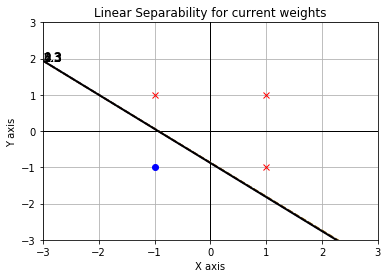

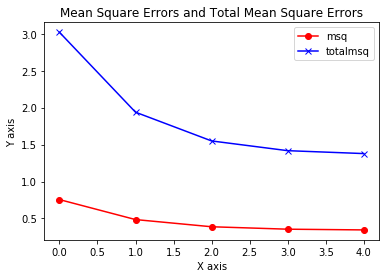

In [63]:
# epochs,alpha,threshold
p = adaline(5,0.1,0)
p.calculate()

In [35]:
p.displayresults()

The weights are : 
[0.4893198443206734, 0.5204043959422489, 0.457548041871211]
---------------------
The set of mean squared errors are : 
[0.7552718725, 3.02108749, 0.4846116573975468, 1.9384466295901872, 0.3873258154221359, 1.5493032616885436, 0.3543777045566816, 1.4175108182267264, 0.34455634185180345, 1.3782253674072138]
---------------------
